In [110]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [56]:
spx = yf.Ticker("SP=F")
gold = yf.Ticker("GC=F")
silver = yf.Ticker("SI=F")

period="5y"

spx_metals = pd.DataFrame({
    "SPX": spx.history(period=period)["Close"],
    "Gold": gold.history(period=period)["Close"],
    "Silver": silver.history(period=period)["Close"],
},
    columns=["SPX", "Gold", "Silver"]
)

spx_metals.dropna(inplace=True)

# spx_metals = (spx_metals - spx_metals.mean()) / spx_metals.std()
# spx_metals.sort_values(by="Date", ascending=False, inplace=True)

In [92]:
print("Correlation Matrix")
spx_metals.corr().style.background_gradient(cmap="BuPu")

Correlation Matrix


,SPX,Gold,Silver
SPX,1.000000,0.658837,0.074580
Gold,0.658837,1.000000,0.386750
Silver,0.074580,0.386750,1.000000


In [91]:
print("R-Squared Matrix")
spx_metals.corr().apply(lambda x: x ** 2).style.background_gradient(cmap="BuPu")

R-Squared MAtrix


,SPX,Gold,Silver
SPX,1.000000,0.434066,0.005562
Gold,0.434066,1.000000,0.149576
Silver,0.005562,0.149576,1.000000


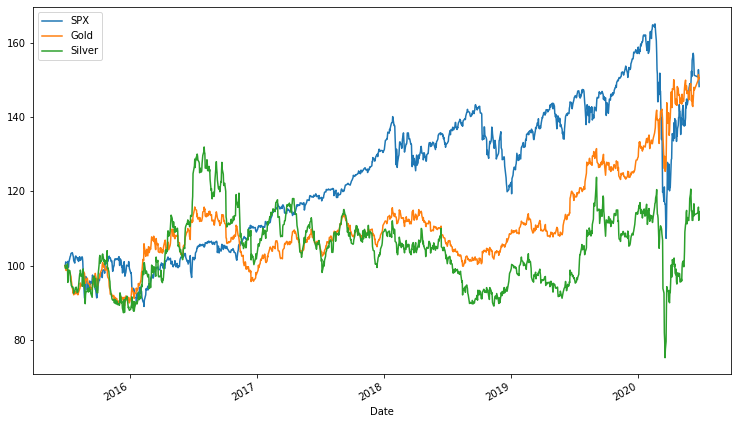

In [45]:
initial = (spx_metals.iloc[0] / 100).to_dict()

spx_metals_rebased = spx_metals / initial

spx_metals_rebased.plot(figsize=(12.5,7.5))

In [46]:
spx_metals_rebased[["SPX_chg", "Gold_chg", "Silver_chg"]] = spx_metals_rebased[["SPX", "Gold", "Silver"]].pct_change()

spx_metals_rebased["SPX_Gold_chg"] = spx_metals_rebased["SPX_chg"] - spx_metals_rebased["Gold_chg"]
spx_metals_rebased["Silver_Gold_chg"] = spx_metals_rebased["Silver_chg"] - spx_metals_rebased["Gold_chg"]


# spx_metals_rebased["SPX_log"] = np.log(spx_metals_rebased["SPX"]) - np.log(spx_metals_rebased["SPX"].shift(1))

spx_metals_rebased.describe()

,SPX,Gold,Silver,SPX_chg,Gold_chg,Silver_chg,SPX_Gold_chg,Silver_Gold_chg
count,1256.000000,1256.000000,1256.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,123.903496,111.240005,104.363271,0.000382,0.000369,0.000231,0.000013,-0.000138
std,18.602323,12.964337,9.274058,0.011610,0.009216,0.015614,0.015111,0.010387
min,88.978298,89.164192,75.159642,-0.142997,-0.046281,-0.121937,-0.123065,-0.095950
25%,105.427944,103.816292,96.998723,-0.003167,-0.003980,-0.006553,-0.006408,-0.004829
50%,125.881492,108.549003,104.789272,0.000485,0.000160,0.000000,0.000488,0.000054
75%,138.554011,113.623250,110.632184,0.005135,0.004745,0.007695,0.007550,0.004573
max,165.188978,151.497667,131.992337,0.068458,0.076410,0.111647,0.082742,0.058089


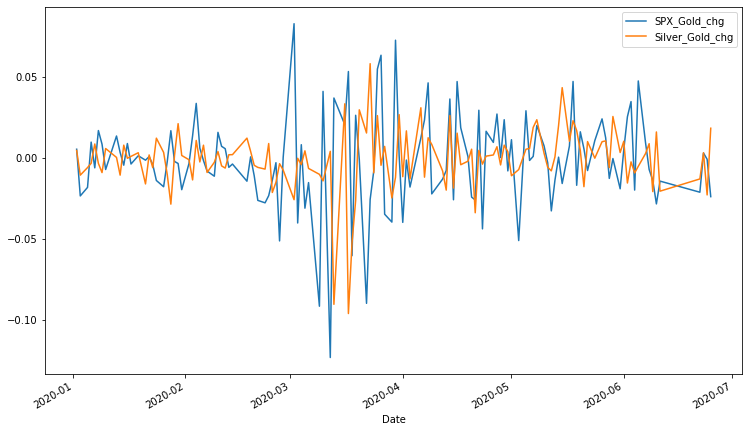

In [47]:
spx_metals_rebased.loc["2020-01-01":, ["SPX_Gold_chg", "Silver_Gold_chg"]].plot(figsize=(12.5,7.5))

In [48]:
spx_metals_rebased.rename(columns={"SPX": "SPX_rebased", "Gold": "Gold_rebased", "Silver": "Silver_rebased"}, inplace=True)
spx_metals = pd.concat([spx_metals, spx_metals_rebased], axis=1)
spx_metals["Gold_Silver_ratio"] = spx_metals["Gold"] / spx_metals["Silver"]
spx_metals["Gold_Silver_ratio_chg"] = spx_metals["Gold_Silver_ratio"].pct_change()
spx_metals.head()

,SPX,Gold,Silver,SPX_rebased,Gold_rebased,Silver_rebased,SPX_chg,Gold_chg,Silver_chg,SPX_Gold_chg,Silver_Gold_chg,Gold_Silver_ratio,Gold_Silver_ratio_chg
Date,,,,,,,,,,,,,
2015-06-29,2050.5,1178.5,15.66,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,75.255428,NaN
2015-06-30,2054.4,1171.5,15.55,100.190198,99.406025,99.297573,0.001902,-0.005940,-0.007024,0.007842,-0.001085,75.337621,0.001092
2015-07-01,2070.9,1169.0,15.55,100.994879,99.193891,99.297573,0.008032,-0.002134,0.000000,0.010166,0.002134,75.176849,-0.002134
2015-07-02,2068.8,1163.0,15.54,100.892465,98.684769,99.233716,-0.001014,-0.005133,-0.000643,0.004119,0.004490,74.839125,-0.004492
2015-07-06,2064.6,1172.9,15.73,100.687637,99.524820,100.446999,-0.002030,0.008512,0.012227,-0.010543,0.003714,74.564526,-0.003669


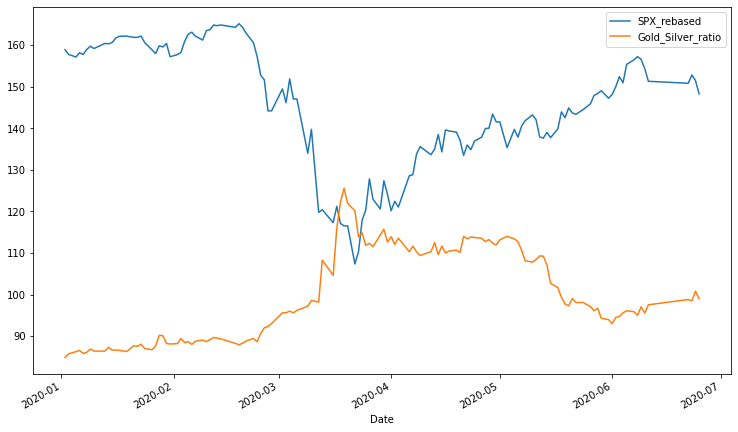

In [49]:
spx_metals.loc["2020-01-01":, ["SPX_rebased", "Gold_Silver_ratio"]].plot(figsize=(12.5, 7.5))

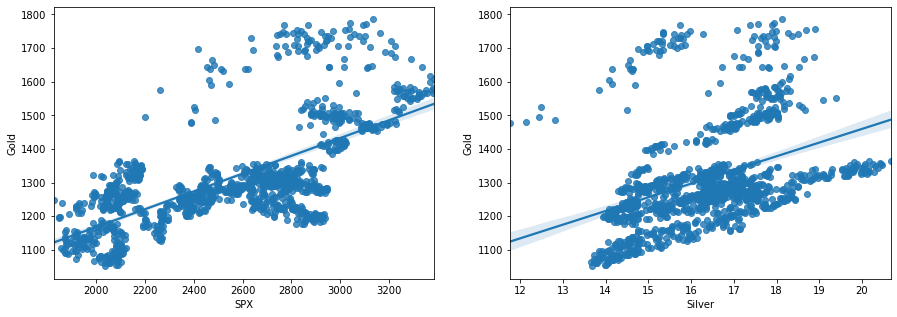

In [107]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.regplot("SPX", "Gold", data=spx_metals)
plt.subplot(1,2,2)
sns.regplot("Silver", "Gold", data=spx_metals)
spx_gold_regression = smf.ols(formula="SPX ~ Gold", data=spx_metals).fit()
mspx_gold_regression.